### ***Package used for project***

In [1]:
#Get data
import yfinance as yf

#Function math
import math

# Data processing
import pandas as pd
import numpy as np
import itertools

# Visual data
import matplotlib.pyplot as plt

### ***Create Object Oriented Progamming***



In [2]:
class SMAInvestment:
    def __init__(self,data,budget,short_sma,long_sma):
        self.data      = data
        self.short_sma = short_sma
        self.long_sma  = long_sma
        self.budget    = budget
        self.pbudget   = budget

    def Stock_price(self):

        #Calculate

        Short_SMA       = self.data["Close"].rolling(window=self.short_sma, min_periods=1).mean()
        Long_SMA        = self.data["Close"].rolling(window=self.long_sma, min_periods=1).mean()
        Position        = np.where(Short_SMA > Long_SMA, 1, 0)
        Position_array  = np.array(Position)
        Signal          = np.diff(Position_array,prepend=Position_array[0])


        #Creat DataFrame

        stock_price = pd.DataFrame(index = self.data.index)

        # Create new columns in the DataFrame to show short and long moving averages

        stock_price["Close"]     = self.data["Close"]
        # stock_price["Adj Close"] = self.data["Adj Close"]
        stock_price["Short SMA"] = Short_SMA
        stock_price["Long SMA"]  = Long_SMA

        # Create a position column which can represent where a crossover happens

        stock_price["Position"]  = Position

        # Create a signal column to determine buy(1) or sell(-1) when position changes

        stock_price["Signal"]    = Signal


        sigPriceBuy  = []
        sigPriceSell = []

        # Flag denoting when the 2 moving averages crossed each other

        flag = -1
        for i in range(len(self.data)):

            if stock_price["Short SMA"][i] > stock_price["Long SMA"][i]:

                if flag != 1:
                    sigPriceBuy.append(stock_price["Close"][i])
                    sigPriceSell.append(np.nan)
                    flag = 1

                else:
                    sigPriceBuy.append(np.nan)
                    sigPriceSell.append(np.nan)


            elif stock_price["Short SMA"][i] < stock_price["Long SMA"][i]:

                if flag != 0:
                    sigPriceBuy.append(np.nan)
                    sigPriceSell.append(stock_price["Close"][i])
                    flag = 0

                else:
                    sigPriceBuy.append(np.nan)
                    sigPriceSell.append(np.nan)


            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)

        stock_price["Buy Signal Price"]  = sigPriceBuy
        stock_price["Sell Signal Price"] = sigPriceSell

        dataset = stock_price.fillna(0)

        self.dataset = dataset

        return dataset
    # Create function calculate profit
    def Profit(self):
        share       = 0
        share_value = 0
        profit      = 0

        for i in range(len(self.data)):

            if self.dataset["Buy Signal Price"][i]!=0:
                share=self.budget//self.dataset["Buy Signal Price"][i]
                share_value=share*self.dataset["Buy Signal Price"][i]
                self.budget=self.budget-share_value

            elif share!=0 and self.dataset["Sell Signal Price"][i]!=0:
                profit=share*self.dataset["Sell Signal Price"][i]-share_value
                self.budget=share*self.dataset["Sell Signal Price"][i]+self.budget
                share=0
                share_value=0

        change_rate =((profit)/self.pbudget)
        form_string= "{}".format(round(change_rate,2))

        return int(profit)


        # print("Total profit:",profit,"\nPercent change in total assets:",form_string.replace(" ", "")
        #              ,"\nRemaining shares are:",int(share),"\nThe remaining shares value are:",round(share_value,2))
    # Create functuon plot data
    def Plot_data(self):

        # Plot close price, short SMA, and long SMA; Set title, y-axis label, and legend
        self.dataset["Close"].plot(color="royalblue", title="SMA Crossover", ylabel="Price", figsize=(15,5),linewidth=2)
        self.dataset["Short SMA"].plot(color="darkorange", label="Short SMA",linewidth=3)
        self.dataset["Long SMA"].plot(color="firebrick", label="Long SMA", grid=True,linewidth=3).legend(loc="upper left")



        # Plot 'buy' signals
        plt.plot(self.dataset[self.dataset["Signal"] == 1].index, self.dataset["Short SMA"][self.dataset["Signal"] == 1], '^'
                 , markersize = 15, color = "g", label = "buy")

        # Plot 'sell' signals
        plt.plot(self.dataset[self.dataset["Signal"] == -1].index, self.dataset["Short SMA"][self.dataset["Signal"] == -1], "v"
                 , markersize = 15, color = "r", label = "sell")




### ***Import data***

In [3]:
data = pd.read_csv("OIL_5m.csv")
data.shape

(9698, 8)

In [4]:
for i in range (1, int(np.sqrt(9698))):
    if 9698%i==0:
        print(i)

1
2
13
26


### ***Set condition***

In [5]:
short_sma = [1,2,3,5,6,7,8,9,10,11,12]
long_sma = [13,14,15,16,17,18,19,20,21,22,23,24]

In [6]:
i=10
j=20

e = 0
f = 26

In [8]:
profit = {}
while i<20:
    if j<40:
        if e < 9698:
            df = data[e:f].reset_index(drop=True)
            sma_investment = SMAInvestment(data = df,budget=1000,short_sma = i,long_sma = j)
            sma_investment.Stock_price()
            revenue = sma_investment.Profit()
            profit[f"SMA_{i}_{j}"]= revenue
            e+=26
            f+=26
        else: j+=1
    else:
        j=20
        i+=1

In [9]:
profit = pd.DataFrame.from_dict(profit, orient='index', columns=["Value"])

In [10]:
profit.T

,SMA_10_20
Value,-3


In [ ]:
profit.max()

Value    5
dtype: int64

In [10]:
indices = profit.index[profit.eq(5).any(axis=1)].tolist()
indices

['SMA_15_20']

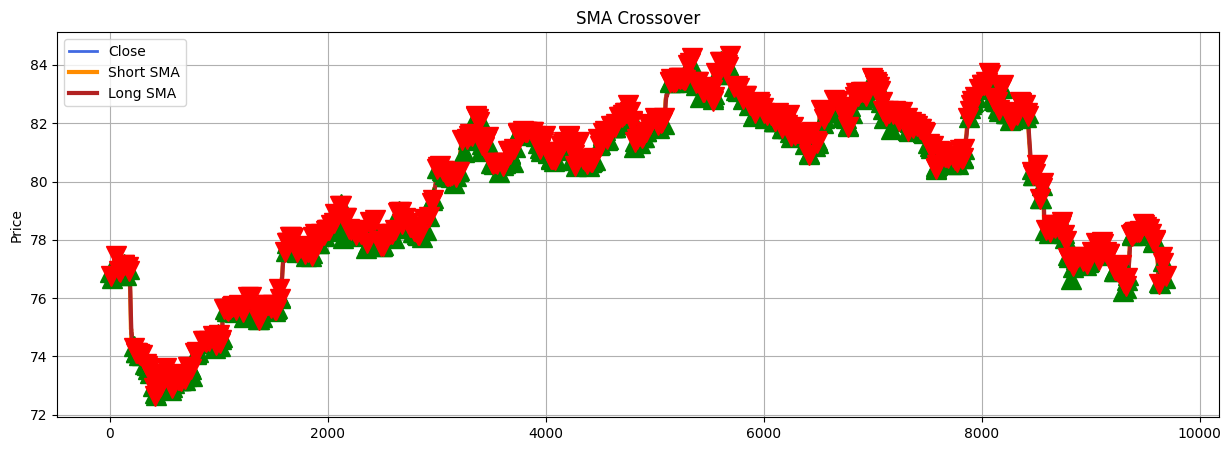

In [19]:
visual_data=sma_investment.Plot_data()
visual_data

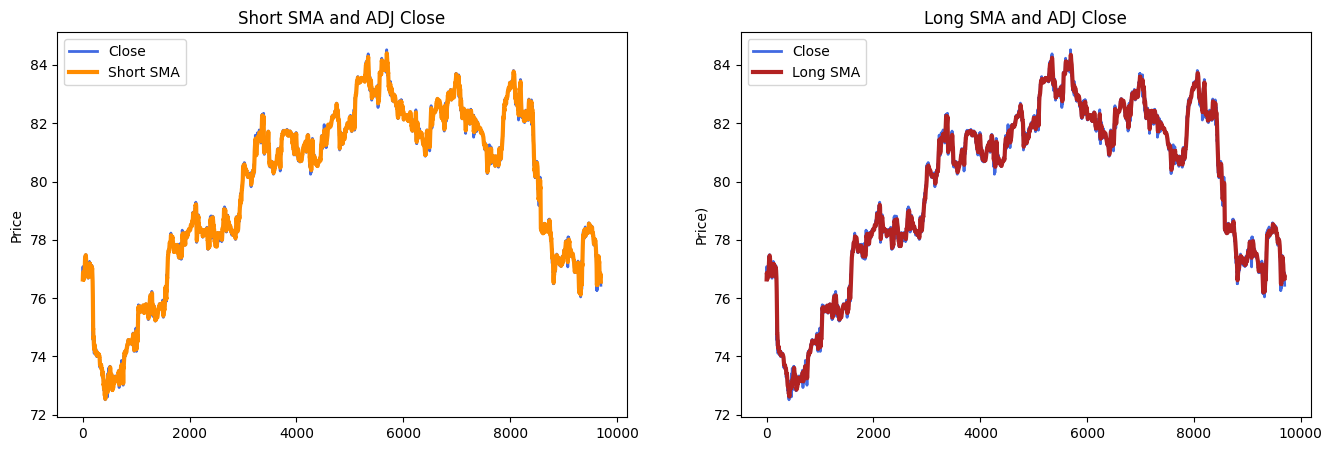

In [21]:
plt.subplot(1,3,1)
new_data["Close"].plot(color="royalblue", title="Short SMA and ADJ Close", ylabel="Price", figsize=(25,5),linewidth=2)
new_data["Short SMA"].plot(color="darkorange", label="Short SMA",linewidth=3)
plt.legend()
plt.subplot(1,3,2)
new_data["Close"].plot(color="royalblue", title="Long SMA and ADJ Close", ylabel="Price)", figsize=(25,5),linewidth=2)
new_data["Long SMA"].plot(color="firebrick", label="Long SMA",linewidth=3)
plt.legend()